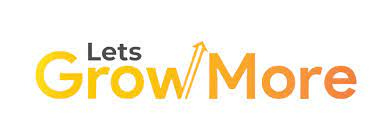

# LetsGrowMore (Data Science Intrenship)

## Task 4 :- Music Recommendation

### Project By :- Kiran Prakash Khandale

# 1. Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from tqdm import tqdm

# 2. Loading  Dataset

In [7]:
ntr = 7000
nts = 3000

train = pd.read_csv('train.csv',nrows=ntr)

names=['msno','song_id','source_system_tab','source_screen_name',\
      'source_type','target']

test1 = pd.read_csv('train.csv',names=names,skiprows=ntr,nrows=nts)

songs = pd.read_csv('songs.csv')

members = pd.read_csv('members.csv')

# 3. Analysing Data

In [8]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [9]:
test1.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,gpioqmDgSWfpkkCSQts5GMAGaM1TFH5zpVawYOjxIog=,my library,Local playlist more,local-library,1
1,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,CQ8ouYUSxeEMbNaql4pAL35CqqJKgd0Ms7tH3DmHOJ8=,my library,Local playlist more,local-library,1
2,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,NA/ZT/ard6XUWrnCvqbEnQLiXnYyP2m4Zq3jWvjLCPY=,my library,Local playlist more,local-library,1
3,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,wloUHWvwV3EYBJsb0hUG1tIeRlgkrf8QzkootXtY/v0=,search,Online playlist more,online-playlist,0
4,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,UZ75pCG2butQs9dVI1s4tedeDZGRwQ551HGdRsVm29Y=,search,Online playlist more,online-playlist,0


In [10]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [11]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


# 4. Data Processing

In [12]:
test = test1.drop(['target'],axis=1)
ytr = np.array(test1['target'])

In [13]:
test.head()

,msno,song_id,source_system_tab,source_screen_name,source_type
0,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,gpioqmDgSWfpkkCSQts5GMAGaM1TFH5zpVawYOjxIog=,my library,Local playlist more,local-library
1,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,CQ8ouYUSxeEMbNaql4pAL35CqqJKgd0Ms7tH3DmHOJ8=,my library,Local playlist more,local-library
2,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,NA/ZT/ard6XUWrnCvqbEnQLiXnYyP2m4Zq3jWvjLCPY=,my library,Local playlist more,local-library
3,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,wloUHWvwV3EYBJsb0hUG1tIeRlgkrf8QzkootXtY/v0=,search,Online playlist more,online-playlist
4,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,UZ75pCG2butQs9dVI1s4tedeDZGRwQ551HGdRsVm29Y=,search,Online playlist more,online-playlist


In [14]:
test_name = ['id','msno','song_id','source_system_tab',\
             'source_screen_name','source_type']
test['id']=np.arange(nts)
test = test[test_name]

In [15]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,gpioqmDgSWfpkkCSQts5GMAGaM1TFH5zpVawYOjxIog=,my library,Local playlist more,local-library
1,1,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,CQ8ouYUSxeEMbNaql4pAL35CqqJKgd0Ms7tH3DmHOJ8=,my library,Local playlist more,local-library
2,2,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,NA/ZT/ard6XUWrnCvqbEnQLiXnYyP2m4Zq3jWvjLCPY=,my library,Local playlist more,local-library
3,3,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,wloUHWvwV3EYBJsb0hUG1tIeRlgkrf8QzkootXtY/v0=,search,Online playlist more,online-playlist
4,4,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,UZ75pCG2butQs9dVI1s4tedeDZGRwQ551HGdRsVm29Y=,search,Online playlist more,online-playlist


# 5. Rearranging Column 

In [16]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [17]:
print('Data preprocessing...')

song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')


Data preprocessing...


# 6. Splitting into Year, Month and Date¶

In [18]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [19]:
members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))

In [20]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_year,registration_month,registration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920,2011,8,20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622,2015,6,28
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712,2016,4,11
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907,2015,9,6
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613,2017,1,26


# 7. Dropping Registration Time Column

In [21]:
members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)

In [22]:
members.head()

,msno,city,bd,gender,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20,2011,8,20,2017,9
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,22,2015,6,28,2017,6
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,12,2016,4,11,2017,7
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,7,2015,9,6,2015,9
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,13,2017,1,26,2017,6


# 8. Left Join with Training and Testing Data

In [23]:
members_cols = members.columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')

In [24]:
train = train.fillna(-1)
test = test.fillna(-1)

In [25]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,artist_name,genre_ids,song_length,language,city,bd,gender,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,-1,-1,-1.0,-1.0,1,0,-1,7,5,2012,1,2,2017,10
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,-1,-1,-1.0,-1.0,13,24,female,9,11,2011,5,25,2017,9
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,Nas,1259,225396.0,52.0,13,24,female,9,11,2011,5,25,2017,9
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,-1,-1,-1.0,-1.0,13,24,female,9,11,2011,5,25,2017,9
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,Brett Young,1011,187802.0,52.0,1,0,-1,7,5,2012,1,2,2017,10


In [26]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type,artist_name,genre_ids,song_length,language,city,bd,gender,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,0,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,gpioqmDgSWfpkkCSQts5GMAGaM1TFH5zpVawYOjxIog=,my library,Local playlist more,local-library,謝和弦 (R-chord),465,268120.0,3.0,12,35,female,9,10,2014,2,9,2017,9
1,1,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,CQ8ouYUSxeEMbNaql4pAL35CqqJKgd0Ms7tH3DmHOJ8=,my library,Local playlist more,local-library,謝和弦 (R-chord),465,265926.0,3.0,12,35,female,9,10,2014,2,9,2017,9
2,2,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,NA/ZT/ard6XUWrnCvqbEnQLiXnYyP2m4Zq3jWvjLCPY=,my library,Local playlist more,local-library,王菀之 (Ivana Wong),458,217896.0,3.0,12,35,female,9,10,2014,2,9,2017,9
3,3,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,wloUHWvwV3EYBJsb0hUG1tIeRlgkrf8QzkootXtY/v0=,search,Online playlist more,online-playlist,Thomas Newman,921,197926.0,52.0,1,0,-1,7,17,2016,8,18,2017,9
4,4,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,UZ75pCG2butQs9dVI1s4tedeDZGRwQ551HGdRsVm29Y=,search,Online playlist more,online-playlist,-1,-1,-1.0,-1.0,1,0,-1,7,17,2016,8,18,2017,9


# 9. Collection Work for Members and Songs

In [27]:
import gc
import pandas as pd
del members, songs; gc.collect();

In [28]:
cols = list(train.columns)
cols.remove('target')

In [29]:
train.head(6)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,artist_name,genre_ids,song_length,language,city,bd,gender,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,-1,-1,-1.0,-1.0,1,0,-1,7,5,2012,1,2,2017,10
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,-1,-1,-1.0,-1.0,13,24,female,9,11,2011,5,25,2017,9
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,Nas,1259,225396.0,52.0,13,24,female,9,11,2011,5,25,2017,9
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,-1,-1,-1.0,-1.0,13,24,female,9,11,2011,5,25,2017,9
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,Brett Young,1011,187802.0,52.0,1,0,-1,7,5,2012,1,2,2017,10
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1,Desiigner,1259,247803.0,52.0,1,0,-1,7,5,2012,1,2,2017,10


In [30]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type,artist_name,genre_ids,song_length,language,city,bd,gender,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,0,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,gpioqmDgSWfpkkCSQts5GMAGaM1TFH5zpVawYOjxIog=,my library,Local playlist more,local-library,謝和弦 (R-chord),465,268120.0,3.0,12,35,female,9,10,2014,2,9,2017,9
1,1,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,CQ8ouYUSxeEMbNaql4pAL35CqqJKgd0Ms7tH3DmHOJ8=,my library,Local playlist more,local-library,謝和弦 (R-chord),465,265926.0,3.0,12,35,female,9,10,2014,2,9,2017,9
2,2,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,NA/ZT/ard6XUWrnCvqbEnQLiXnYyP2m4Zq3jWvjLCPY=,my library,Local playlist more,local-library,王菀之 (Ivana Wong),458,217896.0,3.0,12,35,female,9,10,2014,2,9,2017,9
3,3,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,wloUHWvwV3EYBJsb0hUG1tIeRlgkrf8QzkootXtY/v0=,search,Online playlist more,online-playlist,Thomas Newman,921,197926.0,52.0,1,0,-1,7,17,2016,8,18,2017,9
4,4,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,UZ75pCG2butQs9dVI1s4tedeDZGRwQ551HGdRsVm29Y=,search,Online playlist more,online-playlist,-1,-1,-1.0,-1.0,1,0,-1,7,17,2016,8,18,2017,9


# 10. Label Encoder

In [31]:
for col in tqdm(cols):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|█████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 227.45it/s]


# 11. Song Popularity

In [32]:
unique_songs = range(max(train['song_id'].max(), test['song_id'].max()))
song_popularity = pd.DataFrame({'song_id': unique_songs, 'popularity':0})

train_sorted = train.sort_values('song_id')
train_sorted.reset_index(drop=True, inplace=True)
test_sorted = test.sort_values('song_id')
test_sorted.reset_index(drop=True, inplace=True)

# 12. Model Training and Prediction

In [33]:
# User library size
X = np.array(train.drop(['target'], axis=1))
y = train['target'].values

X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values

del train, test; gc.collect();

X_train, X_valid, y_train, y_valid = train_test_split(X, y, \
    test_size=0.1, random_state = 12)
    
del X, y; gc.collect();

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid) 

watchlist = [d_train, d_valid]

In [34]:
print('Training LGBM model...')

params = {}

params['learning_rate'] = 0.4
params['application'] = 'binary'
params['max_depth'] = 15
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'

model = lgb.train(params, train_set=d_train, num_boost_round=200, valid_sets=watchlist, \
early_stopping_rounds=10, verbose_eval=10)

Training LGBM model...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[8]	training's auc: 0.983839	valid_1's auc: 0.855638


In [35]:
print('Making predictions and saving them...')
p_test = model.predict(X_test)
p_test

Making predictions and saving them...


array([0.93943052, 0.90923191, 0.72415712, ..., 0.6134118 , 0.94162429,
       0.95196105])

# 13. Creating CSV File to Store Id and Target Columns

In [53]:
subm = pd.DataFrame()
subm['id'] = ids
subm['target'] = p_test
subm.to_csv('submission.csv.gz', compression = 'gzip', index=False, float_format = '%.5f')
"prhttp://localhost:8888/notebooks/letsgrowmore/Music%20Recommendation.ipynb"

'prhttp://localhost:8888/notebooks/letsgrowmore/Music%20Recommendation.ipynb'

In [48]:
yhat = (p_test>0.5).astype(int)
comp = (yhat==ytr).astype(int)
acc = comp.sum()/comp.size*100
print('The accuracy of lgbm model on test data is: {0:f}%'.format(acc))

The accuracy of lgbm model on test data is: 78.800000%


# 14. Conclusion

#### The Accuracy of lgbm model is 78.80%




####  Accuracy of Random model is 51.66%



### Hence we conclude that lgbm model is better than random model.